In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# info about dataset

* age = age in years
* sex = (1 = male; 0 = female)
* cp = chest pain type
* trestbps = resting blood pressure (in mm Hg on admission to the hospital)
* chol = serum cholestoral in mg/dl
* fbs = (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg = resting electrocardiographic results
* thalach = maximum heart rate achieved
* exang = exercise induced angina (1 = yes; 0 = no)
* oldpeak= ST depression induced by exercise relative to rest
* slope = the slope of the peak exercise ST segment
* ca = number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [2]:
dataset = pd.read_csv("heart.csv")
dataset.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [3]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# statisctical measures

In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# feature selection

<Axes: >

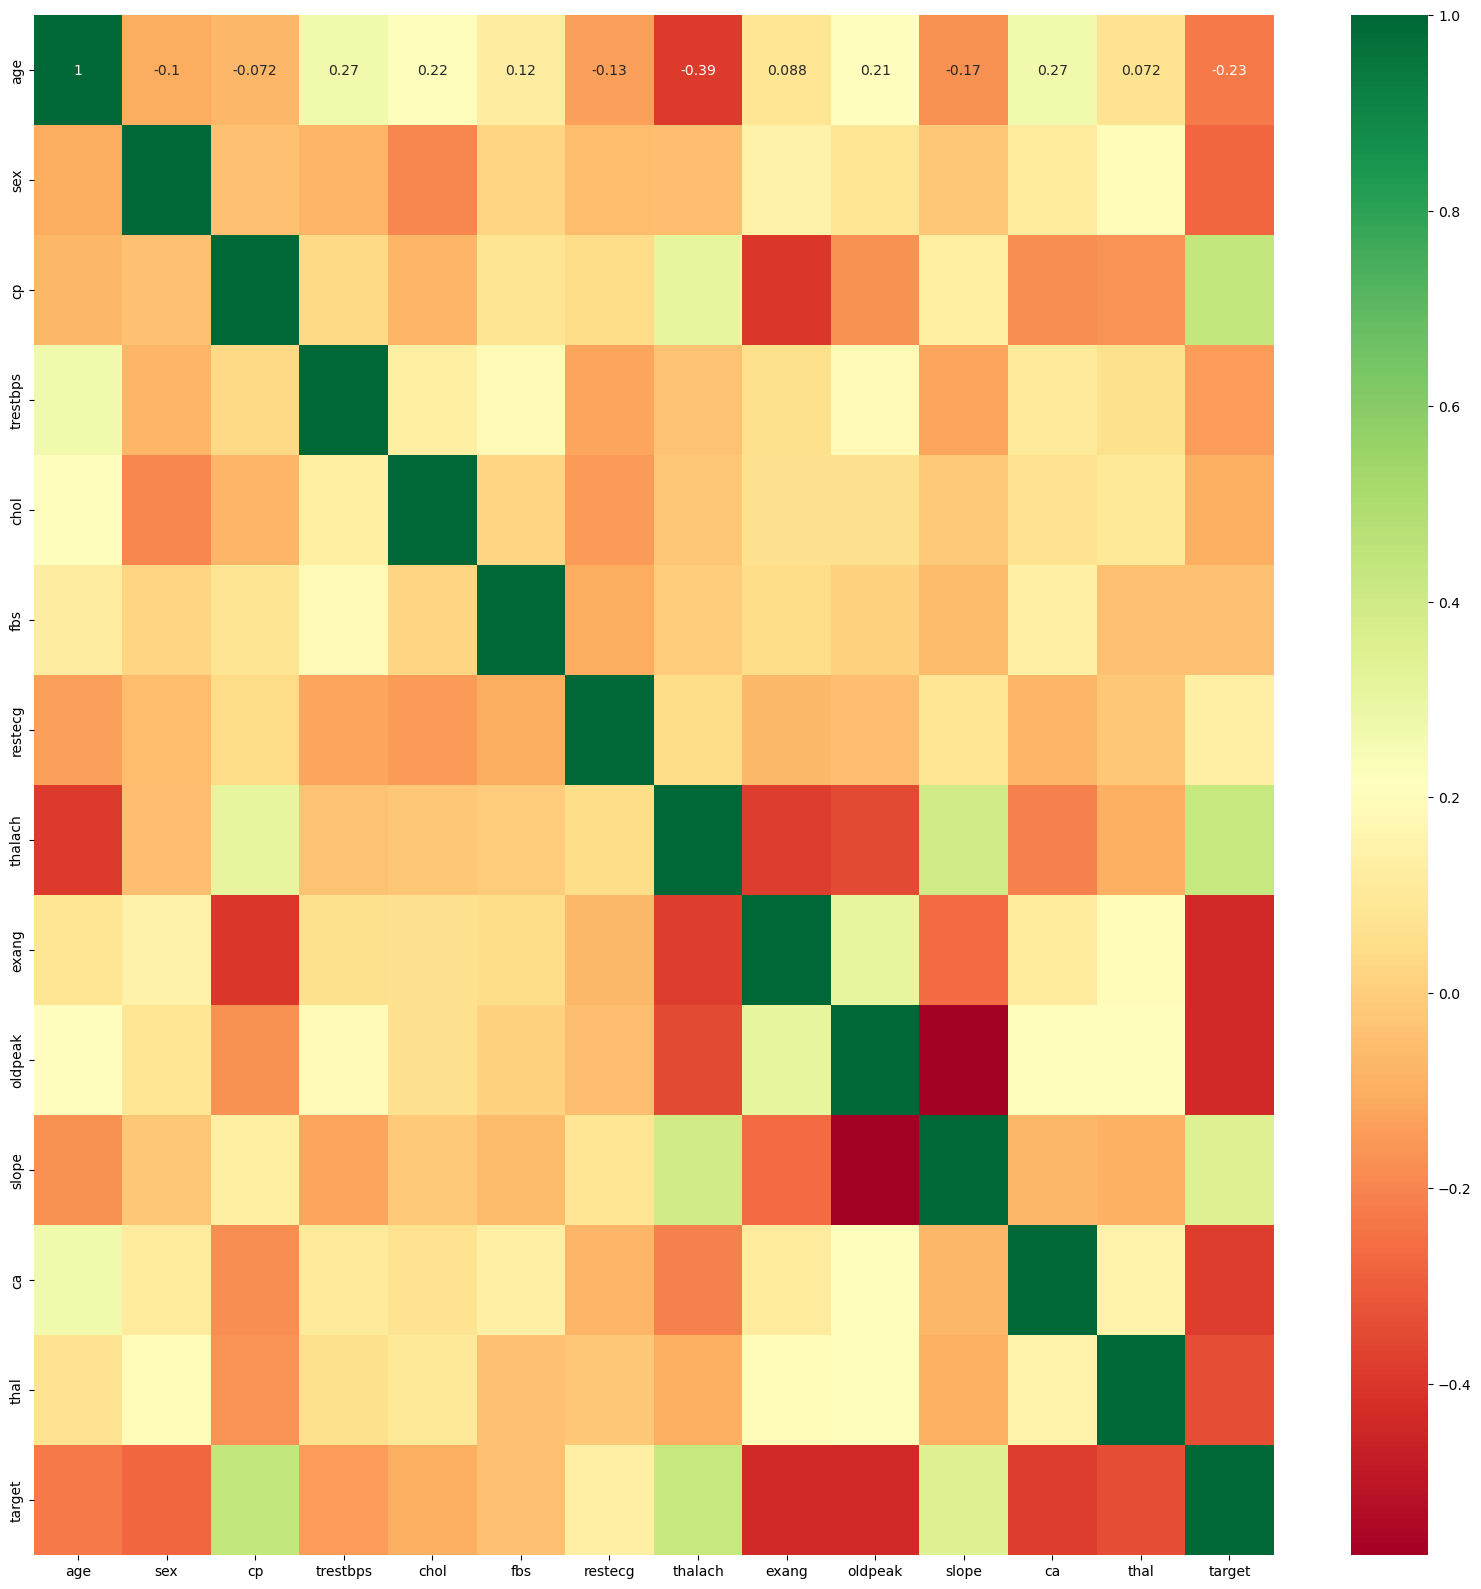

In [20]:
plt.figure(figsize=(20,20))

sns.heatmap(dataset.corr(),annot=True,cmap="RdYlGn" )

<Figure size 2000x2000 with 0 Axes>

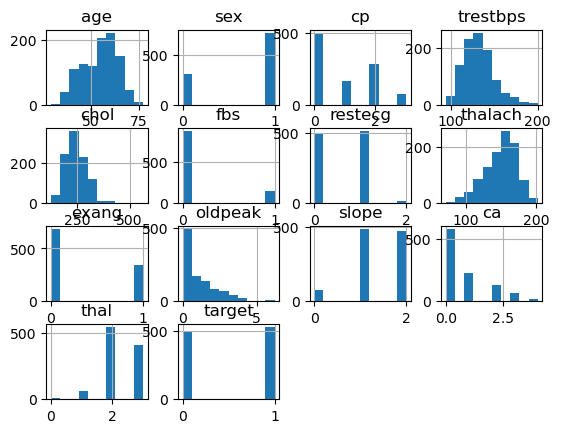

In [21]:
plt.figure(figsize=(20,20))


dataset.hist()
plt.show()

<Axes: xlabel='target', ylabel='count'>

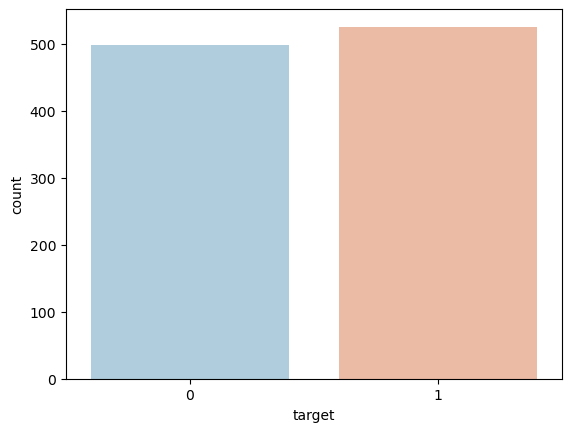

In [23]:
sns.countplot(x='target',data=dataset,palette='RdBu_r')


# processing the data

In [24]:
dataset2 = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])


In [29]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
dataset2[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = ss.fit_transform(dataset2[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

In [31]:
dataset2.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False


# splitting the data

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [52]:

x = dataset2.drop(['target'], axis = 1)
y = dataset2['target']

In [53]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,x,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

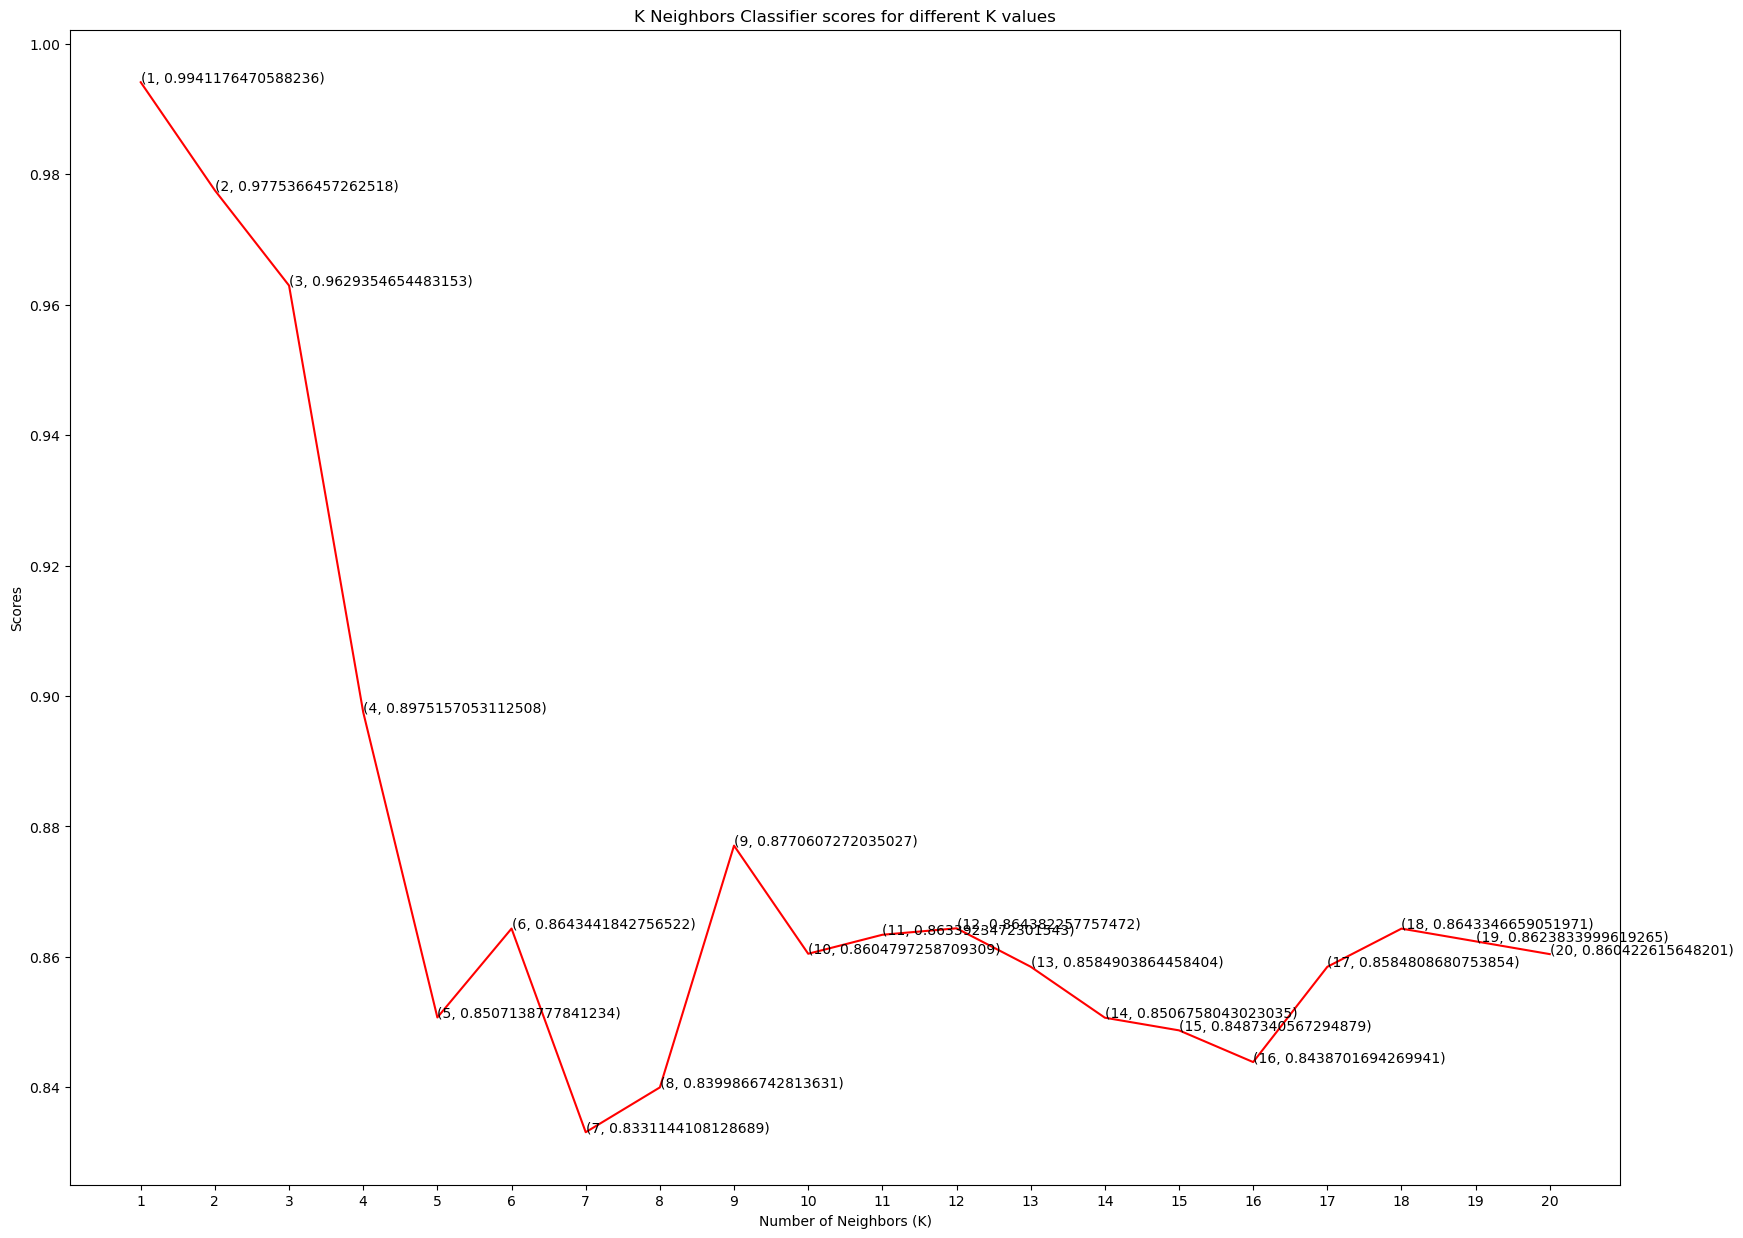

In [54]:
plt.figure(figsize=(20,15))

plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')

for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [59]:
knn_classifier = KNeighborsClassifier(n_neighbors = 1)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [60]:
score.mean()

0.9941176470588236

# Random Forest Classifier


In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,x,y,cv=10)

In [63]:
score.mean()

0.9951170759565962

# Decision tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
decision_classifier = DecisionTreeClassifier()

In [66]:
score=cross_val_score(decision_classifier,x,y,cv=10)

In [67]:
score.mean()

0.9970588235294118

# train test split

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train , x_test , y_train , y_test = train_test_split ( x , y , test_size=0.2 , random_state= 42)

In [71]:
decision_classifier.fit(x_train , y_train)

DecisionTreeClassifier()

In [72]:
decision_classifier.predict(x_test)

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

# evaluating the model

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy_score(y_train ,decision_classifier.predict(x_train) )

1.0

In [76]:
accuracy_score(y_test ,decision_classifier.predict(x_test))

0.9853658536585366